In [1]:
conda install -c plotly plotly=5.11.0

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [28]:
import numpy as np
import plotly
import matplotlib.pyplot as plt
from scipy.integrate import quad
import plotly.graph_objects as go
from IPython.display import HTML, display
import sympy as smp
from sympy.vector import cross

In [38]:
phi = np.linspace(0, 2*np.pi, 100)

def l(phi):
    return (1+3/4 * np.sin(3*phi)) * np.array([np.cos(phi), np.sin(phi), np.zeros(len(phi))])


In [39]:
lx, ly, lz = l(phi)

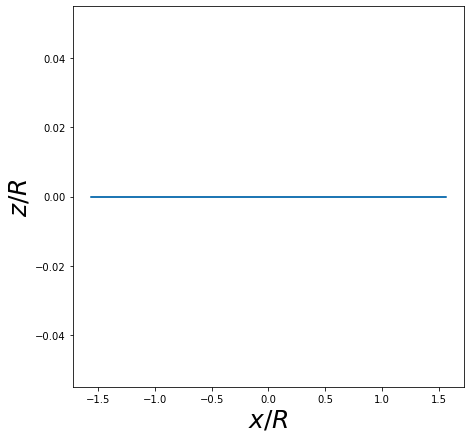

In [40]:
plt.figure(figsize=(7,7))
plt.plot(lx, lz)
plt.xlabel('$x/R$', fontsize=25)
plt.ylabel('$z/R$', fontsize=25)
plt.show()

In [41]:
t, x, y, z = smp.symbols('t, x, y, z')

In [42]:
l = (1+(3/4)*smp.sin(3*t))*smp.Matrix([smp.cos(t), smp.sin(t), 0])
#l = smp.Matrix([smp.cos(t), smp.sin(t), (t-smp.pi)/smp.pi])
r = smp.Matrix([x, y, z])
sep = r-l

In [43]:
integrand = smp.diff(l, t).cross(sep) / sep.norm()**3

In [44]:
dBxdt = smp.lambdify([t, x, y, z], integrand[0])
dBydt = smp.lambdify([t, x, y, z], integrand[1])
dBzdt = smp.lambdify([t, x, y, z], integrand[2])

In [45]:
def B(x, y, z):
    return np.array([quad(dBxdt, 0, 2*np.pi, args=(x, y, z))[0],
                     quad(dBydt, 0, 2*np.pi, args=(x, y, z))[0],
                     quad(dBzdt, 0, 2*np.pi, args=(x, y, z))[0]])

In [46]:
x = np.linspace(-2, 2, 20)
xv, yv, zv = np.meshgrid(x, x, x)

In [47]:
B_field = np.vectorize(B, signature='(),(),()->(n)')(xv, yv, zv)
Bx = B_field[:,:,:,0]
By = B_field[:,:,:,1]
Bz = B_field[:,:,:,2]

In [48]:
Bx[Bx>20] = 20
By[By>20] = 20
Bz[Bz>20] = 20

Bx[Bx<-20] = -20
By[By<-20] = -20
Bz[Bz<-20] = -20

In [49]:
xv.ravel()

array([-2., -2., -2., ...,  2.,  2.,  2.])

In [50]:
data = go.Cone(x=xv.ravel(), y=yv.ravel(), z=zv.ravel(),
               u=Bx.ravel(), v=By.ravel(), w=Bz.ravel(),
               colorscale='Inferno', colorbar=dict(title='$x^2$'),
               sizemode="absolute", sizeref=20)

layout = go.Layout(title=r'Plot Title',
                     scene=dict(xaxis_title=r'x',
                                yaxis_title=r'y',
                                zaxis_title=r'z',
                                aspectratio=dict(x=1, y=1, z=1),
                                camera_eye=dict(x=1.2, y=1.2, z=1.2)))

fig = go.Figure(data = data, layout=layout)
fig.add_scatter3d(x=lx, y=ly, z=lz, mode='lines',
                  line = dict(color='green', width=10))
HTML(fig.to_html())

display_html(fig)